<a href="https://colab.research.google.com/github/OlehFrazik2001/ML/blob/main/Lab5Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

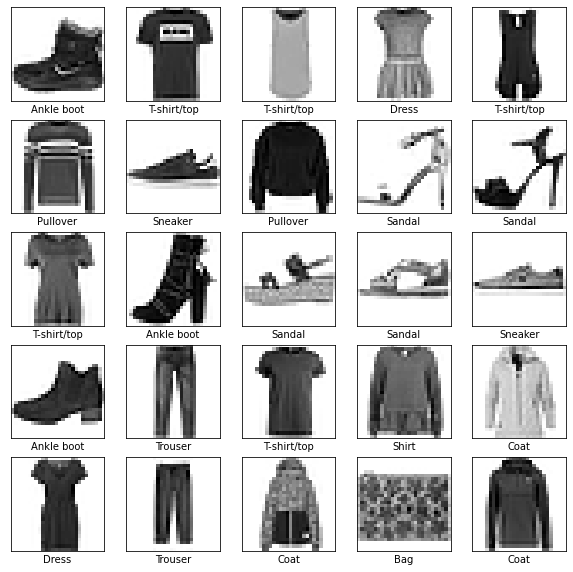

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
hist = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2290 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2212 - accuracy: 0.9158
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2144 - accuracy: 0.9191
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2064 - accuracy: 0.9229
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2018 - accuracy: 0.9238
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1953 - accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1906 - accuracy: 0.9280
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1861 - accuracy: 0.9302
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1806 - accuracy: 0.9317
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.177

In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

In [25]:
np.argmax(predictions[0])

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

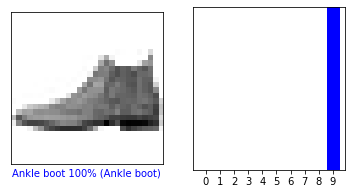

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

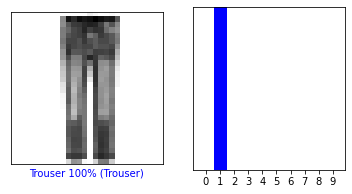

In [28]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

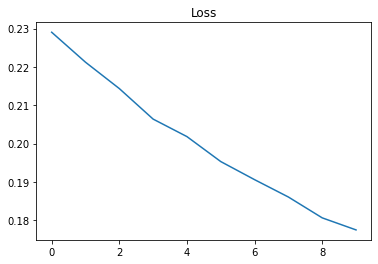

In [30]:
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.show()